## k-최근접 이웃 회귀모델
##### - 분류 : 범주형 데이터를 기준으로 분류하는 방식
##### - 회귀 : 연속형 데이터(숫자)를 예측하는 방식
##### - 회귀는 정해진 범주가 없으며, 임의의 수치값을 출력합니다.
##### 
## k-최근접 이웃 알고리즘은 회귀에도 작동을 합니다.
##### - 작동방식..
##### - 분류와 유사, 예측하려는 데이터에 가장 가까운 이웃 갯수 선택
##### - 종속변수 target데이터가 연속형 데이터를 사용하여 임의 수치값 예측
##### 
## 예측값 결정 방식
##### - 최근접 이웃의 갯수가 정해지면, 이웃한 숫자값들의 '평균'을 계산하여
##### - 평균과 같거나 평균에 가장 근사한 값의 이웃 데이터가 예측값으로 결정됨
#####    (일반 책에서 나오는 개념으로, 실제는 이웃데이터의 평균값이 나온다고 보시면 됩니다.)
#####    그래서 임의 결과값이라고 합니다.

In [68]:
import numpy as np 
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [69]:
print(len(perch_length), len(perch_weight))

print(perch_length)
print('--------------------')
print(perch_weight)

# length(길이) : 특성 데이터(훈련데이터, train_data)
# weight(무게) : 정답 데이터(train_target)

56 56
[ 8.4 13.7 15.  16.2 17.4 18.  18.7 19.  19.6 20.  21.  21.  21.  21.3
 22.  22.  22.  22.  22.  22.5 22.5 22.7 23.  23.5 24.  24.  24.6 25.
 25.6 26.5 27.3 27.5 27.5 27.5 28.  28.7 30.  32.8 34.5 35.  36.5 36.
 37.  37.  39.  39.  39.  40.  40.  40.  40.  42.  43.  43.  43.5 44. ]
--------------------
[   5.9   32.    40.    51.5   70.   100.    78.    80.    85.    85.
  110.   115.   125.   130.   120.   120.   130.   135.   110.   130.
  150.   145.   150.   170.   225.   145.   188.   180.   197.   218.
  300.   260.   265.   250.   250.   300.   320.   514.   556.   840.
  685.   700.   700.   690.   900.   650.   820.   850.   900.  1015.
  820.  1100.  1000.  1100.  1000.  1000. ]


In [70]:
### 시각화를 통해 데이터의 형태 확인 하기..
# - 산점도 시각화

In [71]:
import matplotlib.pyplot as plt

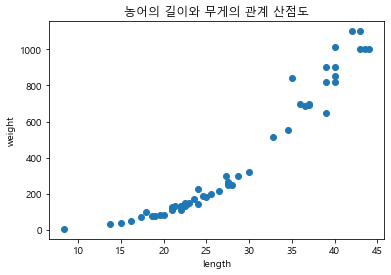

In [72]:
plt.rc('font', family = "Malgun Gothic")
plt.scatter(x=perch_length, y=perch_weight)

plt.xlabel('length')
plt.ylabel('weight')

plt.title('농어의 길이와 무게의 관계 산점도')

plt.show()

# (해석)
# 농어의 길이가 길어질수록 무게가 무거워지는 현상을 보임
# 길이와 무게는 연관성이 있으며,
# 분포 형태는 선형에 가까우나, 조금 라운드가 있음
# 그러나, 선형적 모델을 이용하여 분석을 실시 한후
# 향후, 다항회귀모델을 통해 선형적 모델과 다항회귀모델의 검증결과를 통해
# 선택하고자 함.

## 훈련데이터와 테스트데이터 분류하기

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
train_x, test_x, train_y, test_y = train_test_split(perch_length, perch_weight, random_state=42)

In [75]:
print(train_x)
print('-----------------')
print(train_y)
print('-----------------')
print(test_x)
print('-----------------')
print(test_y)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
-----------------
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
-----------------
[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
-----------------
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]


## 2차원 데이터로 변환하기

In [76]:
train_x_temp = [[e] for e in train_x]
test_x_temp = [[e] for e in test_x]

In [77]:
train_x_temp = np.column_stack([train_x])
test_x_temp = np.column_stack([test_x])

In [78]:
## 차원 확인하기 : numpy 배열 속성에 있습니다.
# 샘플
test_array = np.array([1,2,3,4])
print(test_array)
print(test_array.shape)

[1 2 3 4]
(4,)


In [79]:
# 샘플 2행 2열로 만들기
print(test_array.reshape(2,2))
print(test_array.reshape(4,1))

[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


In [80]:
# 1차원 데이터를 특정 행렬의 2차원으로 재생성할 때 사용하는 함수
# 보통 1차원을 2차원으로 만들때는 각 행의 값이 차원이 됩니다.
# 즉, 각 행의 값이 배열(리스트) 1개라고 보시면 됩니다.
# 1차원을 2차원으로 만들때는 첫번째 행은 전체 갯수, 두번째는 1
# 전체 갯수를 모를 때는 -1값을 사용하면 전체 행의 갯수를 체크합니다.
train_x = train_x.reshape(-1,1)
test_x = test_x.reshape(-1,1)

In [81]:
print(train_x)
print('---------------------')
print(test_x)

[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]
---------------------
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


## k-최근접이웃 회귀 클래스(모델)생성

In [82]:
### 클래스(모델) 이름 : KNeighborsRegressor()
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr

KNeighborsRegressor()

In [83]:
### 훈련데이터 학습시키기 : 훈련모델 생성하기
knr.fit(train_x, train_y)

KNeighborsRegressor()

### 결정계수 공식
###### 결정계수($R^2$) = $1 - ((target - 예측) ^2$ 의 합 / $(target - 평균) ^2$ 의 합)

In [84]:
### 훈련모델 평가하기
# 분류에서는 score의 결과값을 정확도라고 했다면,
# 회귀에서는 결정계수(R^2)라는 용어를 사용합니다.

### 회귀모델의 학습평가 결과 : 결정계수를 이용
# - 회귀에서는 정확한 숫자를 맞히는 것은 불가능

### 결정계수의 범위
# - 0 ~ 1 사이의 값을 반환 받습니다.
# - 1에 가까울 수록 훈련이 잘된 모델이라고 판단하면 됩니다.
# - 보통 0.95이상을 좋다고 판단합니다.(기준은 아님..)

knr.score(test_x, test_y)

0.992809406101064

## 오차 확인하기
##### - 일반적으로 계산에 의한 결정계수값을 봐서는 오차가 어느정도 인지 모릅니다.
##### - 오차 값 확인이 필요합니다.

In [85]:
### 오차를 확인하기 위해서는 예측을 먼저 선행해야 합니다.
test_prediction = knr.predict(test_x)
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [86]:
### 타깃값과 예측값 간의 오차를 확인하는 라이브러리 불러들이기
from sklearn.metrics import mean_absolute_error

In [87]:
### 오차값은 : 테스트 데이터에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_y, test_prediction)
mae

# (해석)
# 예측값이 평균적으로 19g 정도 타깃값과 차이가 있다는 것을 의미
# 차이 = 다르다는 의미는 아닙니다.

19.157142857142862

In [88]:
### 훈련 결정계수
knr.score(train_x, train_y)

0.9698823289099254

## 과대적합 vs 과소적합
##### - 훈련데이터와 테스트데이터를 각각 평가하여 비교 했을 때....
##### - 1. 과대적합 : 훈련데이터의 평가결과가 너무 높고, 테스트데이터의 평가가 너무 낮을 경우
##### - 2. 과소적합 : 훈련데이터의 평가결과가 낮고, 테스트데이터의 평가가 높은 경우
##### 
## 과소적합이 발생하는 이유?
##### - 사용된 전체 데이터의 갯수가 너무 작은 경우에 주로 발생합니다.
##### - 데이터가 작으면 테스트데이터가 훈련데이터의 특징을 잘 따르지 못하는 경우가 발생..

In [ ]:
### 과소적합 해소 방법
# - 훈련모델을 복잡하게 만들어서 평가결과를 높일 수 있음

### 모델을 복잡하게 만드는 방법
# - 이웃의 갯수를 작게하면 됩니다.
# - 이웃의 갯수가 작아지면, 이웃의 비교 대상이 조금 더 압축되기 때문에
# - 훈련의 집중도가 높아 집니다. 정확도가 높아집니다.

### 이웃의 갯수 : 기본 5개
# - 이웃의 갯수는 최소 3개 이상, 홀수로 해야함
# - 복잡도를 높이는 방법은 이웃의 갯수를 줄여나가는 방법 입니다.

In [112]:
for n in range(4, 0, -1):    
    knr = KNeighborsRegressor(n_neighbors = n)
    knr.fit(train_x, train_y)
    if knr.score(test_x, test_y) < knr.score(train_x, train_y):
        print('n이 ', n, '개 일때')
        print('테스트데이터의 결정계수 = ',knr.score(test_x, test_y))
        print('훈련데이터의 결정계수 = ',knr.score(train_x, train_y))
        break

n이  3 개 일때
테스트데이터의 결정계수 =  0.9746459963987609
훈련데이터의 결정계수 =  0.9804899950518966
